In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("C:\\Users\\prava\\Downloads\\data.csv")

In [5]:
data.head

<bound method NDFrame.head of           x1        x2    y
0   0.336494 -0.985951 -1.0
1  -0.011043 -0.105529  1.0
2   0.238160 -0.617417  1.0
3  -0.366783 -0.713819  1.0
4   1.221923 -1.039399 -1.0
..       ...       ...  ...
95 -1.457533 -1.306791 -1.0
96  1.635614  0.273943 -1.0
97  0.113120  0.020465  1.0
98  0.753405  0.193830  1.0
99 -0.538129 -0.000723  1.0

[100 rows x 3 columns]>

In [12]:
X  = np.array(data[['x1', 'x2']])

In [13]:
X[:5, :]

array([[ 0.33649358, -0.98595099],
       [-0.01104253, -0.10552856],
       [ 0.23815951, -0.61741666],
       [-0.36678288, -0.71381872],
       [ 1.22192307, -1.03939899]])

In [14]:
X.shape

(100, 2)

In [15]:
y =np.array(data['y'])

In [16]:
y

array([-1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.])

In [17]:
y.shape

(100,)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
cf1 = LogisticRegression()

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
cf2 = DecisionTreeRegressor()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
cf3 = GradientBoostingClassifier()

In [26]:
from sklearn.svm import SVC

In [28]:
cf4 = SVC(kernel = 'rbf', gamma = 100)

In [30]:
from sklearn.model_selection import learning_curve

In [35]:
def randomize(X, y):
    perm = np.random.permutation(y.shape[0])
    X2 = X[perm,:]
    y2 = y[perm]
    return X2, y2

In [55]:
def plot_learning_curve(X2, y2, estimator, num_of_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X2, y2,train_sizes = np.linspace(0.1, 1, num_of_trainings))
    train_mean= np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores , axis = 1)                                                        
    train_std = np.std(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    plt.plot(train_mean ,'o-', color = 'g', label = 'training_score')
    plt.plot(test_mean, 'o-',color = 'red', label = 'cv score')
    plt.title(estimator)
    plt.xlabel("size")
    plt.ylabel("score ")
    plt.legend()
    plt.show()
                                                            
                                                            

In [56]:
import matplotlib.pyplot as plt

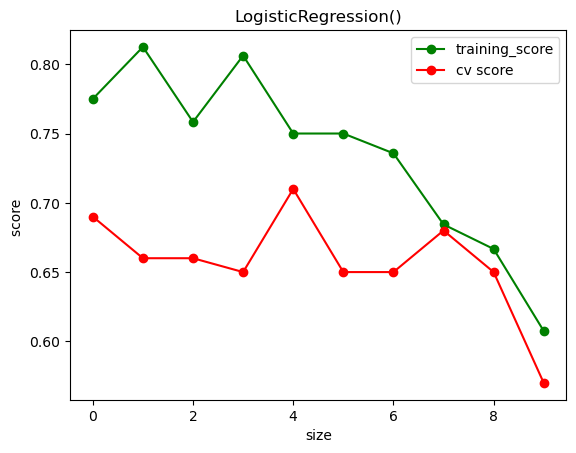

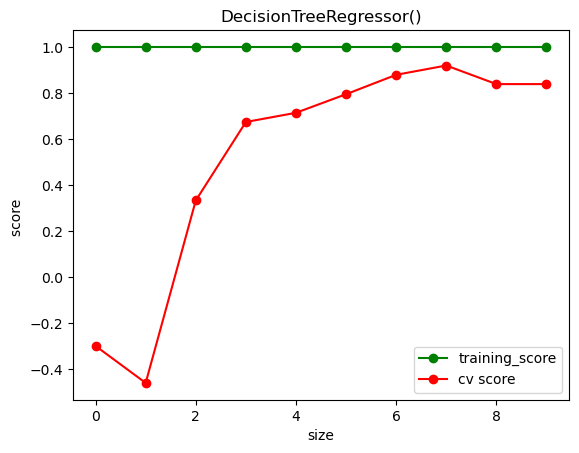

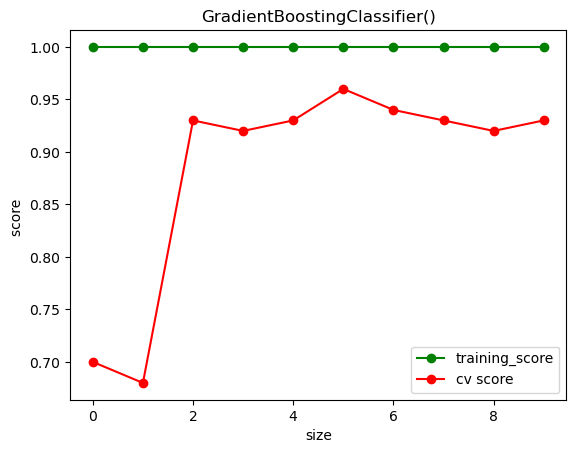

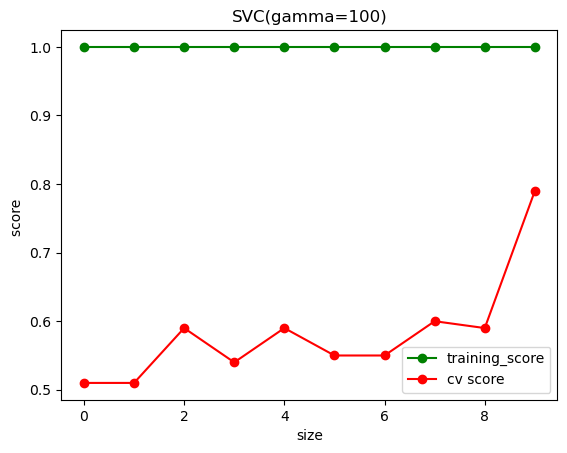

In [57]:
est = [cf1, cf2, cf3, cf4]
X2, y2 = randomize(X, y)
for x in est:
    plot_learning_curve(X2, y2, x, 10)
    